# 1 Problem In Case

In this case, use Early-Stage Diabetes Risk Prediction Data Set to make a model machine
learning to predict diabetics. And research new product Starbuck Drinks that are safe for
diabetics based on important features (Early-Stage Diabetes Risk Prediction Data Set)
and contain sugars in drink menu Starbuck (starbucks_drinkMenu_expanded.csv).

# 2 Analysis Data

In this step, analysis begin with important features from Early-Stage Diabetes Risk
Prediction Data Set. To get importance feature can use library Sklearn
(feature_importance_) . Result show in Picture 1.

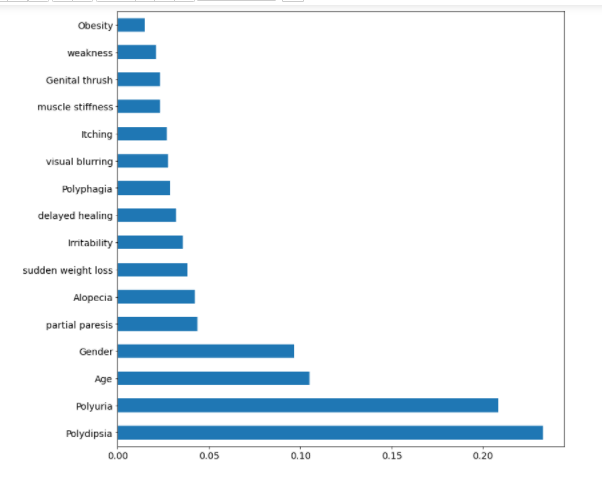

In [40]:
from IPython import display
display.Image("C:\\Users\\mathaillah\\GithubFile\\feature.PNG")

    

From Picture 1. We are focus to Polydispia. Polydipsia is a medical name for the feeling
of extreme thirstiness. So, people who have symptoms of diabetes experience extreme
thirst. Therefore, it can be used as an opportunity to make low-sugar products that are
safe for diabetics.

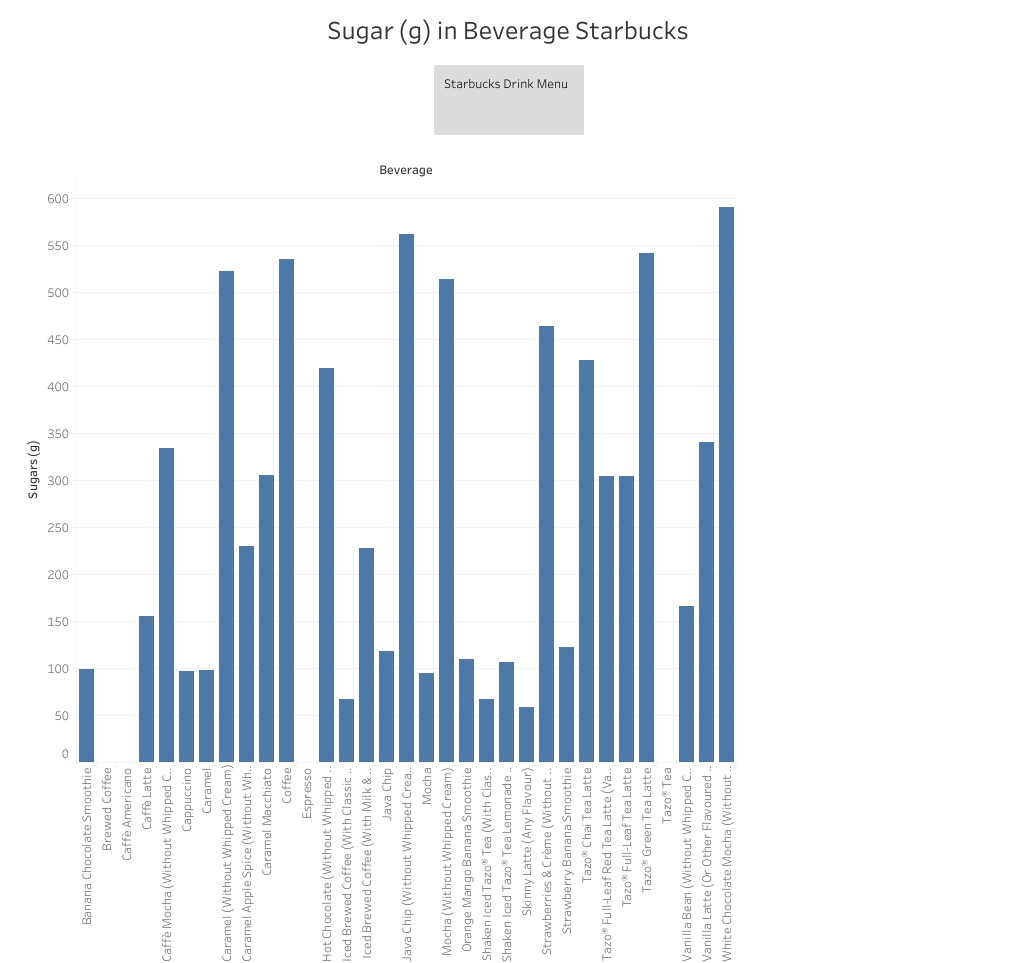

In [2]:
from IPython import display
display.Image("C:\\Users\\mathaillah\\Thinkmatch\\sugar.png")

From Picture 2, we can see almost all drink menu have many sugar. According to the
WHO , the recommended intake is no more than 25 grams of sugar for women, and no
more than 36 grams of sugar for men.

# 3. Make Model Machine Learning

In this step, implementation dataset to model machine learning using
RandomForestClassifier because value have a type binary (yes/no, female/male,
postive/negative).

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [4]:
dataset = pd.read_csv('diabetes_data_upload.csv')
dataset2 = pd.read_csv("starbucks_drinkMenu_expanded.csv")
dataset3 = pd.read_csv('diabetes_data_upload.csv')

In [5]:
# pd.read_csv?

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [7]:
# to know dimension dataset
dataset.shape

(520, 17)

Before make implementation dataset to model machine learning. We must
preprocessing dataset. In this case, data contain string can’t calculate with algoritm in
library. Then we do preprocessing data in the form of objects to become integers

In [8]:
# change feature values to int 
dataset = dataset.replace(to_replace=['Negative', 'Positive'], value=[0, 1])
dataset = dataset.replace(to_replace=['No', 'Yes'], value=[0, 1])
dataset = dataset.replace(to_replace=['Female', 'Male'], value=[0, 1])

In [9]:
# show sample dataset
dataset.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [10]:
# get detail statistical values from dataset
dataset.describe()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,48.028846,0.630769,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,12.151466,0.483061,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.500000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
dataset['class'].value_counts()

1    320
0    200
Name: class, dtype: int64

show mean value based on feature class as a label prediction from all feature attribute data set (ex. Age, gender).

In [12]:
dataset.groupby('class').mean()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
class,,,,,,,,,,,,,,,,
0,46.360000,0.905000,0.075000,0.040000,0.1450,0.43500,0.240000,0.165000,0.290000,0.49500,0.08000,0.430000,0.16,0.300000,0.50500,0.135000
1,49.071875,0.459375,0.759375,0.703125,0.5875,0.68125,0.590625,0.259375,0.546875,0.48125,0.34375,0.478125,0.60,0.421875,0.24375,0.190625


And Spiltting data to preparation make model in the next code.

In [13]:
# Separating Target feature
X = dataset.drop(['class'], axis=1)
y = dataset['class'] 

Show result split data from label to prepare make model machine learning

In [14]:
X

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0


In [15]:
y

0      1
1      1
2      1
3      1
4      1
      ..
515    1
516    1
517    1
518    0
519    0
Name: class, Length: 520, dtype: int64

## Data Standarization

Standard scaler is useful for reducing the value of the range between other values.

In [16]:
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)

In [17]:
print(standardized_data)

[[-0.6613669   0.76509206 -0.99233705 ...  1.29099445  1.38022749
   2.21564684]
 [ 0.82136224  0.76509206 -0.99233705 ... -0.77459667  1.38022749
  -0.45133547]
 [-0.57899306  0.76509206  1.00772212 ...  1.29099445  1.38022749
  -0.45133547]
 ...
 [ 0.82136224 -1.30703226  1.00772212 ...  1.29099445 -0.72451824
   2.21564684]
 [-1.32035762 -1.30703226 -0.99233705 ... -0.77459667  1.38022749
  -0.45133547]
 [-0.49661921  0.76509206 -0.99233705 ... -0.77459667 -0.72451824
  -0.45133547]]


## Separare Dataset

Do the split again but at the value of X that has been done by the standard scaler in the previous code. And ready to make model machine learning.

In [18]:
#separate new X
X = standardized_data
y = dataset['class']

## Split Dataset

In [19]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, stratify=y, random_state=2)

In [20]:
print(X.shape, X_train.shape, X_test.shape)

(520, 16) (416, 16) (104, 16)


## Make Model ML

In this case, we use DesicionTree because the data have a binary type (ex. yes/no)

In [22]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

## Accuracy Trainning Data & Testing Data

We check result model using data trainning and data testing
from spliting dataset in previous code. 

In [23]:
# accuracy score on the training data
X_train_prediction = dtc.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [24]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  1.0


In [25]:
# accuracy score on the test data
X_test_prediction = dtc.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [26]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9711538461538461


We can see the accuracy is 0.9711538461538461 use test data from model


## Making Predictive System 

We input new data in order according to the existing features in the dataset, namely Age, Gender and others up to 16 features. and rescaled as in the previous stage

In [27]:
# Make Input Variable
# input_data = (40,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1)
input_data = (25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = dtc.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[-1.89697451  0.76509206 -0.99233705 -0.90102535 -0.84626923 -1.19105191
  -0.91512613 -0.53584393 -0.90102535 -0.97342978 -0.56550593 -0.9222439
  -0.86991767 -0.77459667 -0.72451824 -0.45133547]]
[0]
The person is not diabetic


In [28]:
# pd.set_option('display.max_rows', dataset2.shape[0]+1)
person = prediction[0]
if person == 1 :
    gender = input_data[1]
    if gender == 1 :
        recom = pd.concat([dataset2["Beverage"], dataset2[" Sugars (g)"] <= 36, dataset2[" Sugars (g)"] ], axis=1) # Male 36 gr / days
        print("For Male Beverages Recomendation: \n",recom)
    else :
        recom = pd.concat([dataset2["Beverage"], dataset2[" Sugars (g)"] <= 26, dataset2[" Sugars (g)"] ], axis=1) # Female 26 gr / days
        print("For Female Beverages Recomendation: \n",recom)
else : 
    print("You Can Drink Anything")

You Can Drink Anything


##  Analysis Importance Features

In [29]:
from matplotlib import pyplot as plt

plt.rcParams.update({'figure.figsize': (12.0, 12.0)})
plt.rcParams.update({'font.size': 14})

In [30]:
dtc.feature_importances_

array([0.0999595 , 0.08746449, 0.12394863, 0.43725164, 0.00779327,
       0.00217634, 0.01620164, 0.02462121, 0.02901786, 0.00175676,
       0.02902909, 0.        , 0.01001116, 0.05064019, 0.07117289,
       0.00895534])

In [31]:
features_name = dataset.drop(['class'], axis=1)
features_name.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')

<AxesSubplot:>

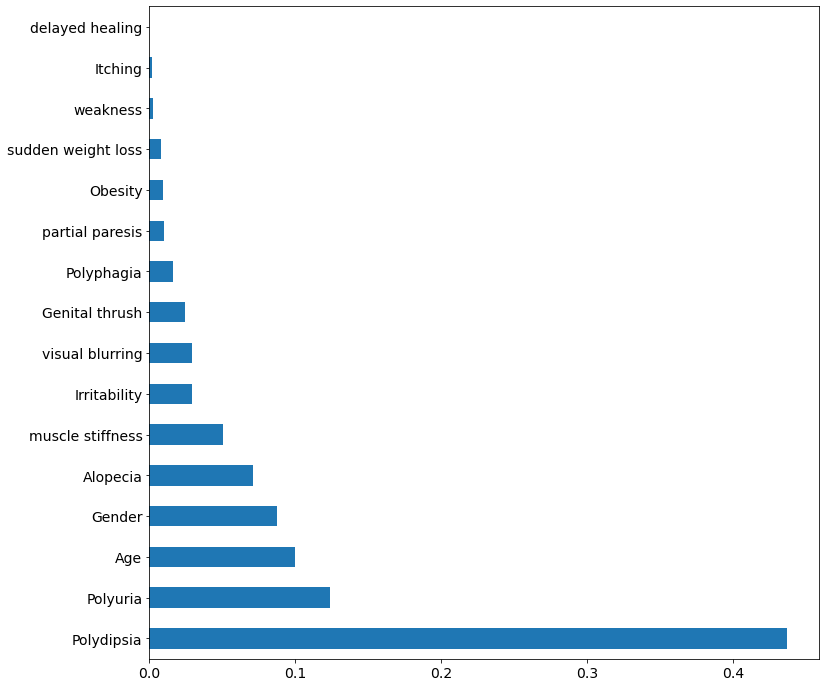

In [32]:
feat_importances = pd.Series(dtc.feature_importances_, index=features_name.columns)
feat_importances.nlargest(16).plot(kind='barh')

In [33]:
dataset2.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [34]:
dataset2.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')

C:\Users\mathaillah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


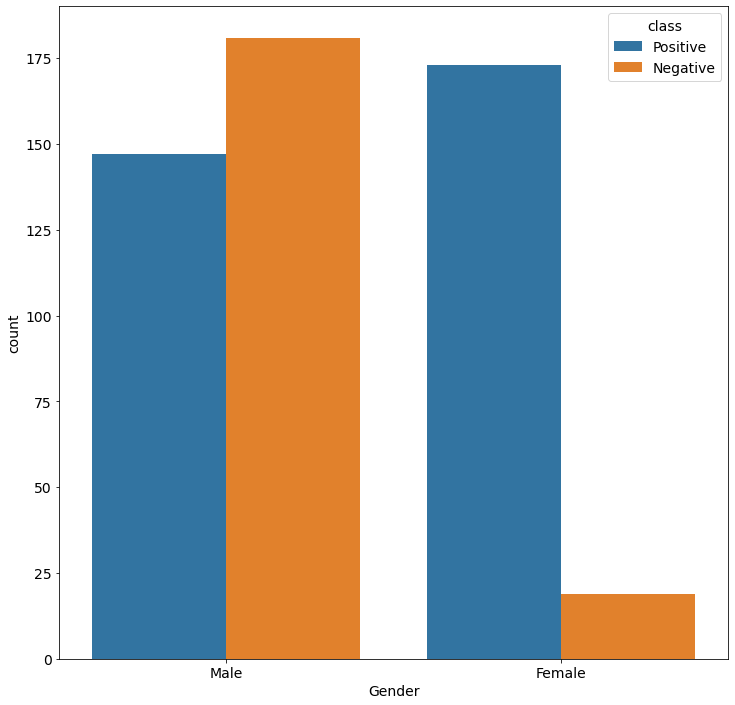

In [35]:
import seaborn as sns



ax = sns.countplot(dataset3['Gender'],hue=dataset3['class'], data=dataset3)


# Result Analysis

From the results of dataset analysis Early-Stage Diabetes Risk Prediction, we know
indicator diabetics is polydispia or extreme thirstiness. This can be used as an
opportunity to create products that are safe for diabetics.

To answer point c in file
exercise, we as a consulting company engaged in IT and Data Science can provide advice
to clients on the implementation of data analysis.
For example in this case, clients can donate the profits from low sugar products to
underprivileged who have diabetics. To improve personal branding that the company is
not only looking for profit but also cares about the health of customers.